

# Identify Residential Neighbourhoods for families with children in the city of Chicago

This is the Capstone Project - Battle of Neighborhoods



# Introduction/Business Problem

Chicago is  one among the biggest cities in the United States.The city is also reported as one among the best big cities to live, with a  ranking of 26th out of 62, according to the report by WalletHub, a personal finance website.According to the  2018 global livability index ,Chicago ranks sixth among the top ten best cities to live in the United States.At the same time, there are also concerns regarding the high crime rate in the city,much higher than the US national average. This makes  the city an apt choice to explore the residential neighbourhoods,that are suitable for families with children .

Given the above background, the purpose of this project is to identify the  residential neighborhoods in Chicago city.The targent audience is familes with children  that are planning to settle in the city of Chicago. 

# Data 

We will start by scraping the Wikipedia page  https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago.  In this page, the neighbourhpoods are listed according to the community area.This will be converted into a data frame.Then we will find the latitude and longitude of each neighbourhood using geopy library.Foursquare API is used to explore the neighbourhood venue categories.We will get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters.The socio economic data of Chicago collected from the Chicago Data Portal is also used here to  segment the venue categories for identifying the best residential neighbourhoods apt for families and children.

# Download required dependencies

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize # 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

# Download and explore the dataset

Chicago is made up of 77 community areas that are often grouped into 9 districts or “sides" and 200 neighbourhoods.  We will scrape the data from Wikipedia page https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago. 

In [2]:
url="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago"
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

# Create Dataframe

In [3]:
r = requests.get(url, headers=header)

tables = pd.read_html(r.text)

df=pd.DataFrame(tables[0])
df.head()
print(df)

                            Neighborhood           Community area
0                            Albany Park              Albany Park
1                        Altgeld Gardens                Riverdale
2                          Andersonville                Edgewater
3                         Archer Heights           Archer Heights
4                          Armour Square            Armour Square
5                                Ashburn                  Ashburn
6                        Ashburn Estates                  Ashburn
7                         Auburn Gresham           Auburn Gresham
8                            Avalon Park              Avalon Park
9                               Avondale                 Avondale
10                      Avondale Gardens              Irving Park
11                     Back of the Yards                 New City
12                       Belmont Central           Belmont Cragin
13                       Belmont Gardens                  Hermosa
14        

# Cleaning the Data set

More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page,  the community area Albany park is listed four times  and and has three  neighborhoods: Mayfair,North Mayfair and Ravenswood Manor. These three rows will be combined into one row with the neighborhoods separated with a comma .

In [4]:
df1=df.groupby("Community area").agg(lambda x:','.join(set(x)))
print(df1)

                                                              Neighborhood
Community area                                                            
Albany Park              Albany Park,Ravenswood Manor,North Mayfair,May...
Archer Heights                                              Archer Heights
Armour Square                    Wentworth Gardens,Armour Square,Chinatown
Ashburn                  Ashburn,Scottsdale,Wrightwood,Beverly View,Ash...
Auburn Gresham                                      Auburn Gresham,Gresham
Austin                       Galewood,South Austin,North Austin,The Island
Austin, Humboldt Park                                   West Humboldt Park
Avalon Park                         Marynook,Avalon Park,Stony Island Park
Avondale                                        Jackowo,Avondale,Wacławowo
Avondale, Irving Park                                       Polish Village
Belmont Cragin                Belmont Central,Hanson Park,Cragin,Brickyard
Beverly                  

It is noted that Wikipedia page has 83 community areas while there are only 77 community areas as per official records.Hence, the errors are corrected by removing some rows  as given below.

In [5]:
df2=df1.drop(["Austin, Humboldt Park", "Avondale, Irving Park","Chatham, Roseland","West Town, Logan Square","Lakeview"])
print(df2)


                                                             Neighborhood
Community area                                                           
Albany Park             Albany Park,Ravenswood Manor,North Mayfair,May...
Archer Heights                                             Archer Heights
Armour Square                   Wentworth Gardens,Armour Square,Chinatown
Ashburn                 Ashburn,Scottsdale,Wrightwood,Beverly View,Ash...
Auburn Gresham                                     Auburn Gresham,Gresham
Austin                      Galewood,South Austin,North Austin,The Island
Avalon Park                        Marynook,Avalon Park,Stony Island Park
Avondale                                       Jackowo,Avondale,Wacławowo
Belmont Cragin               Belmont Central,Hanson Park,Cragin,Brickyard
Beverly                                 Beverly,West Beverly,East Beverly
Bridgeport                                                     Bridgeport
Brighton Park                         

# Latitudes and Longitudes of Each Neighborhood

I have found out the latitudes and longitudes of the neighbourhoods based on community area using google map.



In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_bf37ce7c764345108972bf2ebdbacb37 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yjPXoQBZekG2_1azAT848D4n_QkGTNZOhs6TcePfy_ZN',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bf37ce7c764345108972bf2ebdbacb37.get_object(Bucket='identifyresidentialneighborhoodsi-donotdelete-pr-fvhxfurivgaupj',Key='CHICAGO_lat_lon_CSV.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df3=df_data_1
df3.head()



,Community area,Latitude,Longitude
0,Albany Park,41.95431,-87.72127
1,Archer Heights,41.83793,-87.71332
2,Armour Square,41.81254,-87.63235
3,Ashburn,41.76885,-87.72627
4,Auburn Gresham,41.71191,-87.62089


In [7]:
import pandas as pd
neighborhoods=pd.merge(df3,df2,how='right',on='Community area')
neighborhoods.head(15)

,Community area,Latitude,Longitude,Neighborhood
0,Albany Park,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
1,Archer Heights,41.837930,-87.713320,Archer Heights
2,Armour Square,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
3,Ashburn,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
4,Auburn Gresham,41.711910,-87.620890,"Auburn Gresham,Gresham"
5,Austin,41.857740,-87.714050,"Galewood,South Austin,North Austin,The Island"
6,Avalon Park,41.766340,-87.615290,"Marynook,Avalon Park,Stony Island Park"
7,Avondale,41.954310,-87.721270,"Jackowo,Avondale,Wacławowo"
8,Belmont Cragin,41.953411,-87.764053,"Belmont Central,Hanson Park,Cragin,Brickyard"
9,Beverly,41.689260,-87.674050,"Beverly,West Beverly,East Beverly"


Number of rows and columns in the final table using shape method

In [8]:
neighborhoods.shape

(77, 4)

# Add Additional Data

# Number of Elementary,Middle  and High schools per Community area

elementary schools, crime, population, private residents

In [9]:
#read the Chicago public schools data set

df = pd.read_csv('https://ibm.box.com/shared/static/f9gjvj1gjmxxzycdhplzt01qtz0s7ew7.csv')
df.head(3)

,School ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,Collaborative Name,Adequate Yearly Progress Made?,Track Schedule,CPS Performance Policy Status,CPS Performance Policy Level,HEALTHY_SCHOOL_CERTIFIED,Safety Icon,SAFETY_SCORE,Family Involvement Icon,Family Involvement Score,Environment Icon,Environment Score,Instruction Icon,Instruction Score,Leaders Icon,Leaders Score,Teachers Icon,Teachers Score,Parent Engagement Icon,Parent Engagement Score,Parent Environment Icon,Parent Environment Score,AVERAGE_STUDENT_ATTENDANCE,Rate of Misconducts (per 100 students),Average Teacher Attendance,Individualized Education Program Compliance Rate,Pk-2 Literacy %,Pk-2 Math %,Gr3-5 Grade Level Math %,Gr3-5 Grade Level Read %,Gr3-5 Keep Pace Read %,Gr3-5 Keep Pace Math %,Gr6-8 Grade Level Math %,Gr6-8 Grade Level Read %,Gr6-8 Keep Pace Math%,Gr6-8 Keep Pace Read %,Gr-8 Explore Math %,Gr-8 Explore Read %,ISAT Exceeding Math %,ISAT Exceeding Reading %,ISAT Value Add Math,ISAT Value Add Read,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,Freshman on Track Rate %,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Strong,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Strong,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61.0,NDA,NDA,Average,50.0,Weak,36.0,NDA,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"


In [10]:
#Keep only the columns 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School', 'COMMUNITY_AREA_NAME' in a new data frame Chicago_schools
Chicago_schools = df[['NAME_OF_SCHOOL', 'Elementary, Middle, or High School', 'COMMUNITY_AREA_NAME']]
Chicago_schools.head()

,NAME_OF_SCHOOL,"Elementary, Middle, or High School",COMMUNITY_AREA_NAME
0,Abraham Lincoln Elementary School,ES,LINCOLN PARK
1,Adam Clayton Powell Paideia Community Academy ...,ES,SOUTH SHORE
2,Adlai E Stevenson Elementary School,ES,ASHBURN
3,Agustin Lara Elementary Academy,ES,NEW CITY
4,Air Force Academy High School,HS,ARMOUR SQUARE


In [11]:
#Now column Neighborhood needs to be added to the Chicago_schools data set by merging with the neighborhoods dataset.Before merging, convert the common  column Community area in neighborhood dataset to upper case.
neighborhoods['Community area'] = neighborhoods['Community area'].str.upper() 
neighborhoods

,Community area,Latitude,Longitude,Neighborhood
0,ALBANY PARK,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
1,ARCHER HEIGHTS,41.837930,-87.713320,Archer Heights
2,ARMOUR SQUARE,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
3,ASHBURN,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
4,AUBURN GRESHAM,41.711910,-87.620890,"Auburn Gresham,Gresham"
5,AUSTIN,41.857740,-87.714050,"Galewood,South Austin,North Austin,The Island"
6,AVALON PARK,41.766340,-87.615290,"Marynook,Avalon Park,Stony Island Park"
7,AVONDALE,41.954310,-87.721270,"Jackowo,Avondale,Wacławowo"
8,BELMONT CRAGIN,41.953411,-87.764053,"Belmont Central,Hanson Park,Cragin,Brickyard"
9,BEVERLY,41.689260,-87.674050,"Beverly,West Beverly,East Beverly"


In [12]:
# Merge   the  schools data with the neighborhoods dataset
Chicago_schools = Chicago_schools.join(neighborhoods.set_index('Community area'), on = 'COMMUNITY_AREA_NAME')
Chicago_schools

,NAME_OF_SCHOOL,"Elementary, Middle, or High School",COMMUNITY_AREA_NAME,Latitude,Longitude,Neighborhood
0,Abraham Lincoln Elementary School,ES,LINCOLN PARK,41.918514,-87.637389,"Sheffield Neighbors,Ranch Triangle,Old Town Tr..."
1,Adam Clayton Powell Paideia Community Academy ...,ES,SOUTH SHORE,41.762000,-87.577800,"South Shore,Jackson Park Highlands"
2,Adlai E Stevenson Elementary School,ES,ASHBURN,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
3,Agustin Lara Elementary Academy,ES,NEW CITY,41.812727,-87.638197,"New City,Canaryville,Back of the Yards"
4,Air Force Academy High School,HS,ARMOUR SQUARE,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
5,Albany Park Multicultural Academy,MS,ALBANY PARK,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
6,Albert G Lane Technical High School,HS,NORTH CENTER,41.956100,-87.679200,"Saint Ben's,Roscoe Village,North Center"
7,Albert R Sabin Elementary Magnet School,ES,WEST TOWN,41.893328,-87.673899,"Pulaski Park,East Village,Wicker Park,Smith Pa..."
8,Alcott High School for the Humanities,HS,NORTH CENTER,41.956100,-87.679200,"Saint Ben's,Roscoe Village,North Center"
9,Alessandro Volta Elementary School,ES,ALBANY PARK,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."


In [13]:
Chicago_schools_count =Chicago_schools.groupby('COMMUNITY_AREA_NAME').count().reset_index()
Chicago_schools_count.head()

,COMMUNITY_AREA_NAME,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Latitude,Longitude,Neighborhood
0,ALBANY PARK,8,8,8,8,8
1,ARCHER HEIGHTS,2,2,2,2,2
2,ARMOUR SQUARE,3,3,3,3,3
3,ASHBURN,8,8,8,8,8
4,AUBURN GRESHAM,10,10,10,10,10


# Crowded Housing Rate per Community area

In [14]:
#We will enrich the dataset by adding crowded housing rate per community area. Crowded housing rate is defined as the percentage of occupied housing units with more than one person per room among all occupied housing units.The data is taken from the Chicago data portal, based on the US Census data 2016.

In [15]:
#read crowded housing rate data  from csv file downloaded from Chicago data portal.
Chicago_crowded = pd.read_csv('https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv')
Chicago_crowded.head() 

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [16]:
#keep only columns we need for analysis
Chicago_crowded = Chicago_crowded[['COMMUNITY_AREA_NAME','PERCENT OF HOUSING CROWDED']]
Chicago_crowded.head() 

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED
0,Rogers Park,7.7
1,West Ridge,7.8
2,Uptown,3.8
3,Lincoln Square,3.4
4,North Center,0.3


In [17]:
#Now add column Neighborhood needs to be added to the Chicago_crowded data set by merging with the neighborhoods dataset.Before merging, convert the common  column Community area in neighborhood dataset to upper case.
neighborhoods['Community area'] = neighborhoods['Community area'].str.upper() 
neighborhoods

,Community area,Latitude,Longitude,Neighborhood
0,ALBANY PARK,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
1,ARCHER HEIGHTS,41.837930,-87.713320,Archer Heights
2,ARMOUR SQUARE,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
3,ASHBURN,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
4,AUBURN GRESHAM,41.711910,-87.620890,"Auburn Gresham,Gresham"
5,AUSTIN,41.857740,-87.714050,"Galewood,South Austin,North Austin,The Island"
6,AVALON PARK,41.766340,-87.615290,"Marynook,Avalon Park,Stony Island Park"
7,AVONDALE,41.954310,-87.721270,"Jackowo,Avondale,Wacławowo"
8,BELMONT CRAGIN,41.953411,-87.764053,"Belmont Central,Hanson Park,Cragin,Brickyard"
9,BEVERLY,41.689260,-87.674050,"Beverly,West Beverly,East Beverly"


In [18]:
#convert the common  column COMMUNITY_AREA_NAME in neighborhood dataset to upper case
Chicago_crowded['COMMUNITY_AREA_NAME'] = Chicago_crowded['COMMUNITY_AREA_NAME'].str.upper() 
Chicago_crowded

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED
0,ROGERS PARK,7.7
1,WEST RIDGE,7.8
2,UPTOWN,3.8
3,LINCOLN SQUARE,3.4
4,NORTH CENTER,0.3
5,LAKE VIEW,1.1
6,LINCOLN PARK,0.8
7,NEAR NORTH SIDE,1.9
8,EDISON PARK,1.1
9,NORWOOD PARK,2.0


# Join   the   Chicago_crowded data with the neighborhoods dataset

In [19]:

Chicago_crowded = Chicago_crowded.join(neighborhoods.set_index('Community area'), on = 'COMMUNITY_AREA_NAME')
Chicago_crowded

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
0,ROGERS PARK,7.7,42.008700,-87.665800,"Rogers Park,Loyola"
1,WEST RIDGE,7.8,42.007141,-87.683101,"West Rogers Park,Peterson Park,West Ridge,Rose..."
2,UPTOWN,3.8,41.966600,-87.655500,"Margate Park,Clarendon Park,New Chinatown,Sher..."
3,LINCOLN SQUARE,3.4,41.970000,-87.690000,"Budlong Woods,Ravenswood,Bowmanville,Lincoln S..."
4,NORTH CENTER,0.3,41.956100,-87.679200,"Saint Ben's,Roscoe Village,North Center"
5,LAKE VIEW,1.1,41.947080,-87.652180,"Boystown,North Halsted,South East Ravenswood,W..."
6,LINCOLN PARK,0.8,41.918514,-87.637389,"Sheffield Neighbors,Ranch Triangle,Old Town Tr..."
7,NEAR NORTH SIDE,1.9,41.888900,-87.637700,"Goose Island,Cabrini–Green,Old Town,Streetervi..."
8,EDISON PARK,1.1,42.008060,-87.811770,Edison Park
9,NORWOOD PARK,2.0,41.986664,-87.793325,"Oriole Park,Norwood Park West,Old Norwood,Unio..."


# CRIME DATA PER COMMUNITY AREA

In [20]:
#Now the violent  crimes by neighborhoods in  Chicago  for 2018  is imported from renthop.com .
 
    #import the csv file
    
    
    
body = client_bf37ce7c764345108972bf2ebdbacb37.get_object(Bucket='identifyresidentialneighborhoodsi-donotdelete-pr-fvhxfurivgaupj',Key='violent-crime-in-chicago.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Chicago_crime = pd.read_csv(body)
Chicago_crime.head()



,Community Area,Violent Crimes,Violent Crimes Per Capita
0,Forest Glen,50,0.0027
1,Mount Greenwood,72,0.0038
2,North Center,157,0.0045
3,Dunning,261,0.0061
4,Jeffeson Park,187,0.0069


In [21]:
#convert the common  column Community area in neighborhood dataset to upper case
neighborhoods['Community area'] = neighborhoods['Community area'].str.upper() 
neighborhoods

,Community area,Latitude,Longitude,Neighborhood
0,ALBANY PARK,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
1,ARCHER HEIGHTS,41.837930,-87.713320,Archer Heights
2,ARMOUR SQUARE,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
3,ASHBURN,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
4,AUBURN GRESHAM,41.711910,-87.620890,"Auburn Gresham,Gresham"
5,AUSTIN,41.857740,-87.714050,"Galewood,South Austin,North Austin,The Island"
6,AVALON PARK,41.766340,-87.615290,"Marynook,Avalon Park,Stony Island Park"
7,AVONDALE,41.954310,-87.721270,"Jackowo,Avondale,Wacławowo"
8,BELMONT CRAGIN,41.953411,-87.764053,"Belmont Central,Hanson Park,Cragin,Brickyard"
9,BEVERLY,41.689260,-87.674050,"Beverly,West Beverly,East Beverly"


In [22]:
#convert the common  column Community Area in Chicago_crime dataset to upper case
Chicago_crime['Community Area'] = Chicago_crime['Community Area'].str.upper() 
Chicago_crime

,Community Area,Violent Crimes,Violent Crimes Per Capita
0,FOREST GLEN,50,0.0027
1,MOUNT GREENWOOD,72,0.0038
2,NORTH CENTER,157,0.0045
3,DUNNING,261,0.0061
4,JEFFESON PARK,187,0.0069
5,LINCOLN PARK,489,0.0073
6,NORTH PARK,139,0.0075
7,BRIDGEPORT,256,0.0076
8,LINCOLN SQUARE,348,0.0085
9,LAKE VIEW,864,0.0088


In [23]:
#Join Chicago crimes data with the neighborhood data set
Chicago_crime = Chicago_crime.join(neighborhoods.set_index('Community area'), on = 'Community Area')
Chicago_crime

,Community Area,Violent Crimes,Violent Crimes Per Capita,Latitude,Longitude,Neighborhood
0,FOREST GLEN,50,0.0027,41.989880,-87.758300,"Wildwood,Edgebrook,Old Edgebrook,Sauganash,For..."
1,MOUNT GREENWOOD,72,0.0038,41.698100,-87.708700,"Mount Greenwood,Talley's Corner"
2,NORTH CENTER,157,0.0045,41.956100,-87.679200,"Saint Ben's,Roscoe Village,North Center"
3,DUNNING,261,0.0061,41.972830,-87.888010,"Belmont Heights,Belmont Terrace,Irving Woods,S..."
4,JEFFESON PARK,187,0.0069,NaN,NaN,NaN
5,LINCOLN PARK,489,0.0073,41.918514,-87.637389,"Sheffield Neighbors,Ranch Triangle,Old Town Tr..."
6,NORTH PARK,139,0.0075,41.990000,-87.710000,"River's Edge,Hollywood Park,North Park"
7,BRIDGEPORT,256,0.0076,41.812540,-87.632350,Bridgeport
8,LINCOLN SQUARE,348,0.0085,41.970000,-87.690000,"Budlong Woods,Ravenswood,Bowmanville,Lincoln S..."
9,LAKE VIEW,864,0.0088,41.947080,-87.652180,"Boystown,North Halsted,South East Ravenswood,W..."


# 2.Explore Neighbourhoods in Chicago

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [24]:
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages

# Define Foursquare Credentials and Version

In [25]:
CLIENT_ID = 'JP3RNZDINB4IJESUFY4WWSVOAVIBVYZYW1WL2IQOHXJDUCRG' # your Foursquare ID
CLIENT_SECRET = 'VSTPU1O3DAGO2G2NWHOCTKGB4U4KCBCPE3LQM4DLVTIMLC2V' # your Foursquare Secret
VERSION = '20180604'
Limit=100
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: JP3RNZDINB4IJESUFY4WWSVOAVIBVYZYW1WL2IQOHXJDUCRG
CLIENT_SECRET:VSTPU1O3DAGO2G2NWHOCTKGB4U4KCBCPE3LQM4DLVTIMLC2V


# Explore the first neighbourhood in tha dataframe

Find the name, latitude and longitude of the first neighborhood in the neighbourhood dataframe.

In [26]:
neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Albany Park,Ravenswood Manor,North Mayfair,Mayfair are 41.95431, -87.72126999999999.


top 100 venues that are in the above neighborhood within a radius of 500 meters
First we will create the GET request URL.

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

Send the GET request and examine the results

In [28]:

results = requests.get(url).json()
#results.head()


We see that all the information that we want is in the items key. Before we proceed, we will create the get_category_type function which extracts the category name from a JSON object.

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
#extract the items key from the results
venues = results['response']['groups'][0]['items']
#flatten JSON into a dataframe
nearby_venues = json_normalize(venues) 
#filter columns that we need for further analysis
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
#extract the category for each row using the previously defined function
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Independence Park,Park,41.953624,-87.723690
1,The Original Alps,Breakfast Spot,41.953695,-87.719085
2,Wing Chong Restaurant,Asian Restaurant,41.955470,-87.721463
3,Hot Nails,Nail Salon,41.953941,-87.717524
4,Tony's Finer Foods,Supermarket,41.956154,-87.722428
5,Cafe Urbano,Café,41.956872,-87.723879
6,Hearth & Crust,New American Restaurant,41.953986,-87.718319
7,Chicken Works & Salad Company,American Restaurant,41.953893,-87.719881
8,El Llano Restaurant,Latin American Restaurant,41.953985,-87.719637
9,Guey Lon,Chinese Restaurant,41.953328,-87.718538


Create a function to repeat the same process as above to all the neighborhoods in Toronto

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community area', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The following code executes the above function on each neighborhood and creates a new dataframe called Chicago_venues.

In [32]:
Chicago_venues = getNearbyVenues(names = neighborhoods['Community area'],
                                   latitudes = neighborhoods['Latitude'],
                                   longitudes = neighborhoods['Longitude']
                                  )

ALBANY PARK
ARCHER HEIGHTS
ARMOUR SQUARE
ASHBURN
AUBURN GRESHAM
AUSTIN
AVALON PARK
AVONDALE
BELMONT CRAGIN
BEVERLY
BRIDGEPORT
BRIGHTON PARK
BURNSIDE
CALUMET HEIGHTS
CHATHAM
CHICAGO LAWN
CLEARING
DOUGLAS
DUNNING
EAST GARFIELD PARK
EAST SIDE
EDGEWATER
EDISON PARK
ENGLEWOOD
FOREST GLEN
FULLER PARK
GAGE PARK
GARFIELD RIDGE
GRAND BOULEVARD
GREATER GRAND CROSSING
HEGEWISCH
HERMOSA
HUMBOLDT PARK
HYDE PARK
IRVING PARK
JEFFERSON PARK
KENWOOD
LAKE VIEW
LINCOLN PARK
LINCOLN SQUARE
LOGAN SQUARE
LOWER WEST SIDE
MCKINLEY PARK
MONTCLARE
MORGAN PARK
MOUNT GREENWOOD
NEAR NORTH SIDE
NEAR SOUTH SIDE
NEAR WEST SIDE
NEW CITY
NORTH CENTER
NORTH LAWNDALE
NORTH PARK
NORWOOD PARK
O'HARE
OAKLAND
PORTAGE PARK
PULLMAN
RIVERDALE
ROGERS PARK
ROSELAND
SOUTH CHICAGO
SOUTH DEERING
SOUTH LAWNDALE
SOUTH SHORE
THE LOOP
UPTOWN
WASHINGTON HEIGHTS
WASHINGTON PARK
WEST ELSDON
WEST ENGLEWOOD
WEST GARFIELD PARK
WEST LAWN
WEST PULLMAN
WEST RIDGE
WEST TOWN
WOODLAWN


Size and first few rows of the resulting dataframe Chicag_venues

In [33]:
print(Chicago_venues.shape)
Chicago_venues.head()

(1774, 7)


,Community area,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALBANY PARK,41.95431,-87.72127,Independence Park,41.953624,-87.723690,Park
1,ALBANY PARK,41.95431,-87.72127,The Original Alps,41.953695,-87.719085,Breakfast Spot
2,ALBANY PARK,41.95431,-87.72127,Wing Chong Restaurant,41.955470,-87.721463,Asian Restaurant
3,ALBANY PARK,41.95431,-87.72127,Hot Nails,41.953941,-87.717524,Nail Salon
4,ALBANY PARK,41.95431,-87.72127,Tony's Finer Foods,41.956154,-87.722428,Supermarket


In [34]:

# Save the Chicago_venues so that there  wont be any need to  re-run Foursquare API every time .
Chicago_venues_save = Chicago_venues
#Chicago_venues = Chicago_venues_save

Count number of venue categories in each  community area and draw a histogram to get an understanding of how much data we have per community area.

In [35]:
import matplotlib.pyplot as plt
Chicago_venues_count = Chicago_venues.groupby('Community area').count().reset_index()
Chicago_venues_count = Chicago_venues_count[['Community area', 'Venue Category']]
Chicago_venues_count.columns = ['Community area', 'Venue Category Count']

plt.hist(Chicago_venues_count['Venue Category Count'], bins = 25)
plt.show()

<Figure size 640x480 with 1 Axes>

The above histogram shows that  many community areas  have only a few venue categories (the leftmost bar on the diagram is much higher than the others). These community areas  have too little data to make a meaningful analysis, therefore we will exclude them from the dataset.

In [36]:
#create list with neighborhoods to exclude
neigh_to_exclude = Chicago_venues_count[Chicago_venues_count['Venue Category Count']<4]
#create filtered dataframe by excluding neighborhoods in above list
Chicago_venues_filt = Chicago_venues[~Chicago_venues['Community area'].isin(neigh_to_exclude)]
#rename filtered dataframe back to Chicago_venues
Chicago_venues = Chicago_venues_filt
#check counts after filtering
Chicago_venues.groupby('Community area').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community area,,,,,,
ALBANY PARK,23,23,23,23,23,23
ARCHER HEIGHTS,3,3,3,3,3,3
ARMOUR SQUARE,9,9,9,9,9,9
ASHBURN,20,20,20,20,20,20
AUBURN GRESHAM,5,5,5,5,5,5
AUSTIN,4,4,4,4,4,4
AVALON PARK,11,11,11,11,11,11
AVONDALE,23,23,23,23,23,23
BELMONT CRAGIN,28,28,28,28,28,28


# 3. Analyze Each Neighborhood

We will do one hot encoding to pivot category values into columns of the dataframe.

There is one observation that we have to be careful about: one of the category values is Neighborhood. After one hot encoding, this value will become a column name. We are already using the column Neighborhood to represent the neighborhood name. To avoid confusing these columns, we will rename the column that comes from one hot encoding as Neighborhood Category.

In [37]:
# one hot encoding
Chicago_onehot = pd.get_dummies(Chicago_venues[['Venue Category']], prefix="", prefix_sep="")

#rename the column 'Neighborhood' which represents a category name to 'Neighborhood Category' 
#this is to distinguish this column from the 'Neighborhood' column which we want to continue to use as the neighborhood name
Chicago_onehot.rename(columns={'Neighborhood':'Neighborhood Category'}, inplace=True)

# add neighborhood column back to dataframe
Chicago_onehot['Community area'] = Chicago_venues['Community area'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_onehot.columns[-1]] + list(Chicago_onehot.columns[:-1])
Chicago_onehot = Chicago_onehot[fixed_columns]

Chicago_onehot.head()

,Community area,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ALBANY PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Check the size of the new data frame

In [38]:
Chicago_onehot.shape

(1774, 257)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [39]:
Chicago_grouped = Chicago_onehot.groupby('Community area').mean().reset_index()
Chicago_grouped.head(10)

,Community area,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ALBANY PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.00,0.043478,0.0,0.0,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043478,0.0,0.0,0.000000,0.043478,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.043478,0.0,0.0,0.0,0.

Check the size of the new dataframe

In [40]:
Chicago_grouped.shape

(77, 257)

# Store the above into a pandas dataframe. 
Write a function to sort the venues in descending order

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False).to_frame().reset_index()
    row_cutoff = row_categories_sorted.head(num_top_venues)
    row_cutoff.columns = ['Venue', 'Appears']
    return_array = row_cutoff['Venue'].where(row_cutoff['Appears'] != 0, other = np.NaN, axis = 0)

    return return_array.values

Create the new dataframe and display the top 10 venues for each neighborhood

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [43]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Community area'] = Chicago_grouped['Community area']


In [44]:
neighborhoods_venues_sorted.head()

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALBANY PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARCHER HEIGHTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARMOUR SQUARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASHBURN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUBURN GRESHAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
for ind in np.arange(Chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chicago_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALBANY PARK,Thai Restaurant,Nail Salon,Supermarket,Mobile Phone Shop,Bar,Italian Restaurant,Café,BBQ Joint,Latin American Restaurant,Middle Eastern Restaurant
1,ARCHER HEIGHTS,Mexican Restaurant,Ice Cream Shop,Nightclub,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARMOUR SQUARE,Fast Food Restaurant,Food,Chinese Restaurant,Train Station,Baseball Field,Bus Station,Sandwich Place,Department Store,NaN,NaN
3,ASHBURN,Mexican Restaurant,Seafood Restaurant,Fast Food Restaurant,Ice Cream Shop,Bowling Alley,Italian Restaurant,Pizza Place,Diner,Discount Store,Donut Shop
4,AUBURN GRESHAM,Pharmacy,Bank,Fried Chicken Joint,Liquor Store,Discount Store,NaN,NaN,NaN,NaN,NaN


In [46]:
neighborhoods_venues_sorted.groupby(['1st Most Common Venue']).size()

1st Most Common Venue
ATM                        2
American Restaurant        2
Art Gallery                3
BBQ Joint                  1
Bakery                     2
Bar                        5
Boutique                   1
Coffee Shop                4
Cosmetics Shop             3
Currency Exchange          2
Dance Studio               1
Donut Shop                 1
Fast Food Restaurant       6
Food & Drink Shop          1
Fried Chicken Joint        1
Furniture / Home Store     1
Gay Bar                    1
Grocery Store              1
Gym / Fitness Center       1
Italian Restaurant         1
Mexican Restaurant        15
Other Great Outdoors       2
Park                       5
Pharmacy                   1
Pizza Place                1
Sandwich Place             4
Shoe Store                 1
Snack Place                2
Sushi Restaurant           1
Thai Restaurant            2
Theater                    1
Video Store                1
Zoo Exhibit                1
dtype: int64

# 4. Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [47]:
#join population data
Chicago_grouped = Chicago_grouped.join(Chicago_crowded.set_index('COMMUNITY_AREA_NAME'),on='Community area')


In [48]:
#replace null values with 0
Chicago_grouped['PERCENT OF HOUSING CROWDED'].fillna(0, inplace=True)
Chicago_grouped.head()

,Community area,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
0,ALBANY PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.00,0.043478,0.0,0.0,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0

In [49]:
Chicago_grouped =Chicago_grouped.drop (['Latitude', 'Longitude','Neighborhood'], axis=1)


In [50]:
Chicago_grouped

,Community area,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,PERCENT OF HOUSING CROWDED
0,ALBANY PARK,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.043478,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.043478,0.0,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.043478,0.0000,0.00

In [51]:
# set number of clusters
kclusters = 5

Chicago_grouped_clustering = Chicago_grouped.drop('Community area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 4, 4, 3, 3, 4, 0, 4, 1, 0, 3, 2, 4, 0, 3, 4, 3, 0, 4, 4, 4, 3,
       0, 3, 0, 3, 2, 3, 3, 3, 3, 4, 2, 0, 4, 3, 3, 0, 0, 3, 3, 1, 4, 0,
       0, 0, 0, 0, 3, 1, 0, 4, 3, 0, 3, 0, 3, 0, 4, 4, 3, 3, 3, 2, 3, 0,
       3, 0, 4, 1, 3, 1, 4, 3, 4, 0, 3], dtype=int32)


Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Chicago_merged = neighborhoods_venues_sorted

# merge Chicago_merged with Chicago_crowded data to add latitude/longitude for each neighborhood
Chicago_merged = Chicago_merged.join(Chicago_crowded.set_index('COMMUNITY_AREA_NAME'), on='Community area')




In [53]:
Chicago_merged['Latitude'].fillna(0, inplace=True)
Chicago_merged['Longitude'].fillna(0, inplace=True)
Chicago_merged['Neighborhood'].fillna(0, inplace=True)
Chicago_merged

,Cluster Labels,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
0,1,ALBANY PARK,Thai Restaurant,Nail Salon,Supermarket,Mobile Phone Shop,Bar,Italian Restaurant,Café,BBQ Joint,Latin American Restaurant,Middle Eastern Restaurant,11.3,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
1,4,ARCHER HEIGHTS,Mexican Restaurant,Ice Cream Shop,Nightclub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,41.837930,-87.713320,Archer Heights
2,4,ARMOUR SQUARE,Fast Food Restaurant,Food,Chinese Restaurant,Train Station,Baseball Field,Bus Station,Sandwich Place,Department Store,NaN,NaN,5.7,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
3,3,ASHBURN,Mexican Restaurant,Seafood Restaurant,Fast Food Restaurant,Ice Cream Shop,Bowling Alley,Italian Restaurant,Pizza Place,Diner,Discount Store,Donut Shop,4.0,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
4,3,AUBURN GRESHAM,Pharmacy,Bank,Fried Chicken Joint,Liquor Store,Discount Store,NaN,NaN,NaN,NaN,NaN,4.0,41.711910,-87.620890,"Auburn Gresham,Gresham"
5,4,AUSTIN,BBQ Joint,Train Station,Park,Seafood Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,6.3,41.857740,-87.714050,"Galewood,South Austin,North Austin,The Island"
6,0,AVALON PARK,Currency Exchange,Lounge,Chinese Restaurant,Spa,Fast Food Restaurant,Seafood Restaurant,Caribbean Restaurant,Park,Convenience Store,NaN,1.4,41.766340,-87.615290,"Marynook,Avalon Park,Stony Island Park"
7,4,AVONDALE,Thai Restaurant,Nail Salon,Supermarket,Mobile Phone Shop,Bar,Italian Restaurant,Café,BBQ Joint,Latin American Restaurant,Middle Eastern Restaurant,6.0,41.954310,-87.721270,"Jackowo,Avondale,Wacławowo"
8,1,BELMONT CRAGIN,Mexican Restaurant,Park,Fast Food Restaurant,Dog Run,Nightclub,South American Restaurant,Farmers Market,Bus Station,Sports Bar,Bike Shop,10.8,41.953411,-87.764053,"Belmont Central,Hanson Park,Cragin,Brickyard"
9,0,BEVERLY,Boutique,Construction & Landscaping,Train Station,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,0.9,41.689260,-87.674050,"Beverly,West Beverly,East Beverly"


Visualize the resulting clusters

In [54]:
address = 'Chicago'
geolocator = Nominatim(user_agent="Chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



In [56]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Chicago_merged['Latitude'], Chicago_merged['Longitude'], Chicago_merged['Neighborhood'], Chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Examine Clusters
We will examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

In [61]:
def total_venue_categories(df):
    df_all_venues = df['1st Most Common Venue']
    df_all_venues = df_all_venues.append(df['2nd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['3rd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['4th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['5th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['6th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['7th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['8th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['9th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['10th Most Common Venue'])
    df_cnt = df_all_venues.value_counts().to_frame().reset_index()
    df_cnt.columns = ['Venue Category', 'Venue Count']
    df_cnt.sort_values(by = 'Venue Count', ascending = False)
#return the top 10 venue categories
    return df_cnt.head(10)

# Cluster 0

In [59]:
Chicago_cluster0 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 0, Chicago_merged.columns[[1] + list(range(2, Chicago_merged.shape[1]))]]
Chicago_cluster0

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
6,AVALON PARK,Currency Exchange,Lounge,Chinese Restaurant,Spa,Fast Food Restaurant,Seafood Restaurant,Caribbean Restaurant,Park,Convenience Store,NaN,1.4,41.766340,-87.615290,"Marynook,Avalon Park,Stony Island Park"
9,BEVERLY,Boutique,Construction & Landscaping,Train Station,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,0.9,41.689260,-87.674050,"Beverly,West Beverly,East Beverly"
13,CALUMET HEIGHTS,Grocery Store,Pizza Place,Park,Burger Joint,Mexican Restaurant,Ice Cream Shop,Italian Restaurant,Train Station,NaN,NaN,2.1,41.741400,-87.554610,"Pill Hill,Calumet Heights"
17,DOUGLAS,Art Gallery,American Restaurant,Breakfast Spot,BBQ Joint,Deli / Bodega,Plaza,Clothing Store,Caribbean Restaurant,Sandwich Place,Shoe Store,1.8,41.811070,-87.616810,"The Gap,Prairie Shores,Stateway Gardens,Grovel..."
22,EDISON PARK,Food & Drink Shop,Park,Italian Restaurant,Chinese Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,1.1,42.008060,-87.811770,Edison Park
24,FOREST GLEN,Other Great Outdoors,Playground,Park,Golf Course,Moving Target,NaN,NaN,NaN,NaN,NaN,1.1,41.989880,-87.758300,"Wildwood,Edgebrook,Old Edgebrook,Sauganash,For..."
33,HYDE PARK,Sandwich Place,Bookstore,Bike Rental / Bike Share,Japanese Restaurant,Thai Restaurant,Dive Bar,French Restaurant,Bakery,Taco Place,Mexican Restaurant,1.5,41.793170,-87.591520,"Hyde Park,East Hyde Park"
37,LAKE VIEW,Gay Bar,Bar,General Entertainment,Sports Bar,Sandwich Place,Mexican Restaurant,Coffee Shop,Thai Restaurant,Pizza Place,Dive Bar,1.1,41.947080,-87.652180,"Boystown,North Halsted,South East Ravenswood,W..."
38,LINCOLN PARK,Zoo Exhibit,American Restaurant,Pizza Place,Bar,Italian Restaurant,Sushi Restaurant,Coffee Shop,Park,Pharmacy,Bus Station,0.8,41.918514,-87.637389,"Sheffield Neighbors,Ranch Triangle,Old Town Tr..."
43,MONTCLARE,Furniture / Home Store,Optical Shop,Bank,Martial Arts Dojo,Bakery,Czech Restaurant,Sports Bar,Mexican Restaurant,Grocery Store,Ice Cream Shop,NaN,0.000000,0.000000,0


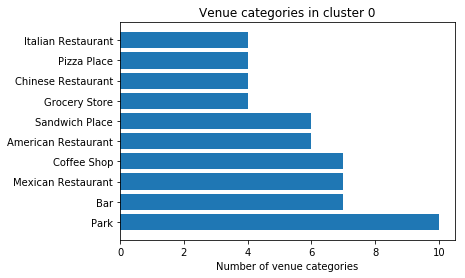

In [62]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(Chicago_merged[Chicago_merged['Cluster Labels'] == 0])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center')
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 0')
 
plt.show()


This is a cluster of neighborhoods with parks,bars,coffee shops, restaurants and grocery store.

In [71]:
Chicago_cluster1 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 1, Chicago_merged.columns[[1] + list(range(2, Chicago_merged.shape[1]))]]
Chicago_cluster1

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
0,ALBANY PARK,Thai Restaurant,Nail Salon,Supermarket,Mobile Phone Shop,Bar,Italian Restaurant,Café,BBQ Joint,Latin American Restaurant,Middle Eastern Restaurant,11.3,41.954310,-87.721270,"Albany Park,Ravenswood Manor,North Mayfair,May..."
8,BELMONT CRAGIN,Mexican Restaurant,Park,Fast Food Restaurant,Dog Run,Nightclub,South American Restaurant,Farmers Market,Bus Station,Sports Bar,Bike Shop,10.8,41.953411,-87.764053,"Belmont Central,Hanson Park,Cragin,Brickyard"
41,LOWER WEST SIDE,Mexican Restaurant,Thrift / Vintage Store,Pizza Place,Convenience Store,Bakery,Bar,Fried Chicken Joint,Latin American Restaurant,Supermarket,Coffee Shop,9.6,41.854200,-87.665600,"Lower West Side,Heart of Chicago,Pilsen,East P..."
49,NEW CITY,Pizza Place,Baseball Field,Bar,Sandwich Place,NaN,NaN,NaN,NaN,NaN,NaN,11.9,41.812727,-87.638197,"New City,Canaryville,Back of the Yards"
69,WEST ELSDON,Mexican Restaurant,Bar,Currency Exchange,Video Store,Bakery,Donut Shop,Supermarket,Grocery Store,Gym / Fitness Center,Fried Chicken Joint,11.1,41.793900,-87.724500,West Elsdon
71,WEST GARFIELD PARK,Shoe Store,Fast Food Restaurant,Fried Chicken Joint,Clothing Store,Cosmetics Shop,Kids Store,Convenience Store,Sandwich Place,Mobile Phone Shop,Middle Eastern Restaurant,9.4,41.880600,-87.729200,West Garfield Park


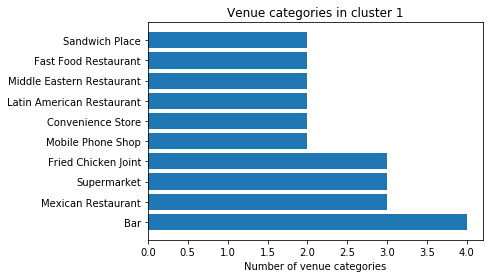

In [73]:
#count venue categories in all neighborhoods in the cluster
t1 = total_venue_categories(Chicago_merged[Chicago_merged['Cluster Labels'] == 1])

y_pos = np.arange(len(t1['Venue Category']))
plt.barh(y_pos, t1['Venue Count'], align='center')
plt.yticks(y_pos, t1['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 1')
 
plt.show()

In [ ]:
This is a cluster of neighborhoods with bar , restaurants, ,supermarket, mobile phone shop and  convenience stores .

# Cluster2:

In [63]:
Chicago_cluster2 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 2, Chicago_merged.columns[[1] + list(range(2, Chicago_merged.shape[1]))]]
Chicago_cluster2

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
11,BRIGHTON PARK,Mexican Restaurant,Gas Station,Donut Shop,Chinese Restaurant,Pharmacy,Diner,Flower Shop,Seafood Restaurant,Sandwich Place,Train,14.4,41.829960,-87.671463,Brighton Park
26,GAGE PARK,Mexican Restaurant,Sporting Goods Shop,Asian Restaurant,Convenience Store,Construction & Landscaping,Chinese Restaurant,Sandwich Place,Bakery,Currency Exchange,NaN,15.8,41.795300,-87.696130,Gage Park
32,HUMBOLDT PARK,Mexican Restaurant,Mobile Phone Shop,Bakery,Bus Line,Bus Station,Storage Facility,Supermarket,Latin American Restaurant,Bar,Park,14.8,41.926189,-87.732094,Humboldt Park
63,SOUTH LAWNDALE,Mexican Restaurant,Mobile Phone Shop,Grocery Store,Liquor Store,Supermarket,Bank,Bakery,Restaurant,Clothing Store,Home Service,15.2,41.843600,-87.712600,"Marshall Square,Little Village,South Lawndale"


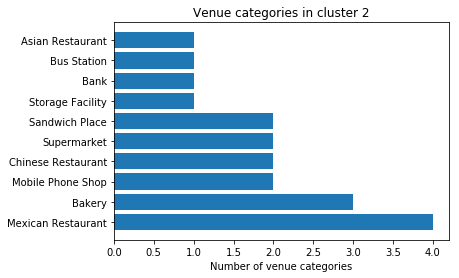

In [64]:
#count venue categories in all neighborhoods in the cluster
t2 = total_venue_categories(Chicago_merged[Chicago_merged['Cluster Labels'] == 2])

y_pos = np.arange(len(t2['Venue Category']))
plt.barh(y_pos, t2['Venue Count'], align='center')
plt.yticks(y_pos, t2['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 2')
 
plt.show()


This is a cluster of neighborhoods with restaurants , bakeries, clothing store,supermarket,mobile phone shop, coupled with pharmacy and train .

# Cluster 3

In [65]:
Chicago_cluster3 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 3, Chicago_merged.columns[[1] + list(range(2, Chicago_merged.shape[1]))]]
Chicago_cluster3

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
3,ASHBURN,Mexican Restaurant,Seafood Restaurant,Fast Food Restaurant,Ice Cream Shop,Bowling Alley,Italian Restaurant,Pizza Place,Diner,Discount Store,Donut Shop,4.0,41.768850,-87.726270,"Ashburn,Scottsdale,Wrightwood,Beverly View,Ash..."
4,AUBURN GRESHAM,Pharmacy,Bank,Fried Chicken Joint,Liquor Store,Discount Store,NaN,NaN,NaN,NaN,NaN,4.0,41.711910,-87.620890,"Auburn Gresham,Gresham"
10,BRIDGEPORT,Fast Food Restaurant,Food,Chinese Restaurant,Train Station,Baseball Field,Bus Station,Sandwich Place,Department Store,NaN,NaN,4.5,41.812540,-87.632350,Bridgeport
14,CHATHAM,Currency Exchange,Lounge,Chinese Restaurant,Spa,Fast Food Restaurant,Seafood Restaurant,Caribbean Restaurant,Park,Convenience Store,NaN,3.3,41.766340,-87.615290,"West Chatham,Chatham,East Chatham"
16,CLEARING,Bakery,Food,Gas Station,Eastern European Restaurant,Smoke Shop,Sandwich Place,Pub,Bank,Rental Car Location,NaN,2.7,41.776420,-87.805880,"Chrysler Village,Clearing West,Clearing East"
21,EDGEWATER,Sushi Restaurant,Wine Bar,Mexican Restaurant,Thai Restaurant,Indian Restaurant,Asian Restaurant,Ethiopian Restaurant,Café,Garden Center,Bank,4.1,41.986752,-87.663239,"Edgewater,Edgewater Glen,Edgewater Beach,Ander..."
23,ENGLEWOOD,ATM,Train Station,Grocery Store,Mexican Restaurant,Donut Shop,Coffee Shop,Restaurant,Business Service,Sandwich Place,Seafood Restaurant,3.8,41.778900,-87.641880,"Englewood,Hamilton Park"
25,FULLER PARK,Fast Food Restaurant,Bus Station,Food,Department Store,Park,Train Station,Baseball Field,NaN,NaN,NaN,3.2,41.809860,-87.633392,Fuller Park
27,GARFIELD RIDGE,Bakery,Food,Gas Station,Eastern European Restaurant,Smoke Shop,Sandwich Place,Pub,Bank,Rental Car Location,NaN,2.6,41.776420,-87.805880,"Garfield Ridge,Sleepy Hollow,Vittum Park,LeCla..."
28,GRAND BOULEVARD,Art Gallery,American Restaurant,Breakfast Spot,BBQ Joint,Deli / Bodega,Plaza,Clothing Store,Caribbean Restaurant,Sandwich Place,Shoe Store,3.3,41.811070,-87.616810,"Grand Boulevard,Legends South (Robert Taylor H..."


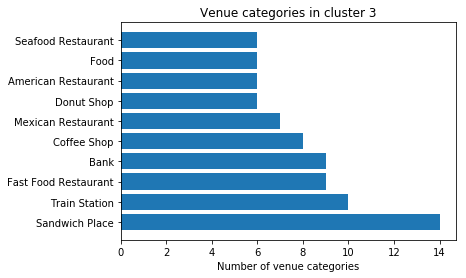

In [66]:
#count venue categories in all neighborhoods in the cluster
t3 = total_venue_categories(Chicago_merged[Chicago_merged['Cluster Labels'] == 3])

y_pos = np.arange(len(t3['Venue Category']))
plt.barh(y_pos, t3['Venue Count'], align='center')
plt.yticks(y_pos, t3['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 3')
 
plt.show()

This cluster has mostly sandwich places,train station, high end restaurants and hotels with bank and park, which suggests it is made up of downtown neighborhoods.

# Cluster 4

In [67]:
Chicago_cluster4 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 4, Chicago_merged.columns[[1] + list(range(2, Chicago_merged.shape[1]))]]
Chicago_cluster4

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PERCENT OF HOUSING CROWDED,Latitude,Longitude,Neighborhood
1,ARCHER HEIGHTS,Mexican Restaurant,Ice Cream Shop,Nightclub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,41.837930,-87.713320,Archer Heights
2,ARMOUR SQUARE,Fast Food Restaurant,Food,Chinese Restaurant,Train Station,Baseball Field,Bus Station,Sandwich Place,Department Store,NaN,NaN,5.7,41.812540,-87.632350,"Wentworth Gardens,Armour Square,Chinatown"
5,AUSTIN,BBQ Joint,Train Station,Park,Seafood Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,6.3,41.857740,-87.714050,"Galewood,South Austin,North Austin,The Island"
7,AVONDALE,Thai Restaurant,Nail Salon,Supermarket,Mobile Phone Shop,Bar,Italian Restaurant,Café,BBQ Joint,Latin American Restaurant,Middle Eastern Restaurant,6.0,41.954310,-87.721270,"Jackowo,Avondale,Wacławowo"
12,BURNSIDE,Bar,History Museum,American Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,41.703560,-87.598340,Burnside
15,CHICAGO LAWN,Mexican Restaurant,Sporting Goods Shop,Asian Restaurant,Convenience Store,Construction & Landscaping,Chinese Restaurant,Sandwich Place,Bakery,Currency Exchange,NaN,7.6,41.795300,-87.696129,"Lithuanian Plaza,Chicago Lawn,Marquette Park"
18,DUNNING,American Restaurant,Airport Lounge,Airport Terminal,Mediterranean Restaurant,Asian Restaurant,Hot Dog Joint,Gourmet Shop,Mexican Restaurant,Lounge,Boutique,5.2,41.972830,-87.888010,"Belmont Heights,Belmont Terrace,Irving Woods,S..."
19,EAST GARFIELD PARK,Video Store,Donut Shop,Sandwich Place,Park,Fast Food Restaurant,Bus Line,Gym,Grocery Store,Music Venue,Liquor Store,8.2,41.900810,-87.714650,"Fifth City,East Garfield Park"
20,EAST SIDE,Snack Place,Home Service,Hunting Supply,Food Court,Racetrack,NaN,NaN,NaN,NaN,NaN,6.8,41.666340,-87.559410,East Side
31,HERMOSA,Mexican Restaurant,Mobile Phone Shop,Bakery,Bus Line,Bus Station,Storage Facility,Supermarket,Latin American Restaurant,Bar,Park,6.9,41.926190,-87.732090,"Kelvyn Park,Belmont Gardens,Hermosa"


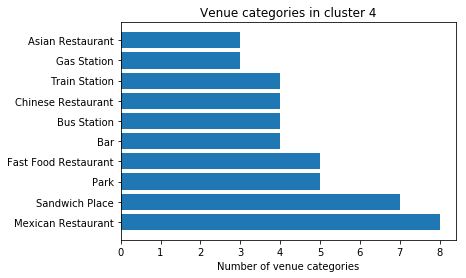

In [68]:
#count venue categories in all neighborhoods in the cluster
t4 = total_venue_categories(Chicago_merged[Chicago_merged['Cluster Labels'] == 4])

y_pos = np.arange(len(t4['Venue Category']))
plt.barh(y_pos, t4['Venue Count'], align='center')
plt.yticks(y_pos, t4['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 4')
 
plt.show()

Venue categories in this cluster appear to be predominantly restaurants  and fast food type restaurants which all suggest places where one can find something quick to eat,coupled with park,busstation and some gas stations.

# Discussion
Among the above clusters it would appear that the following clusters are best suited for families with children:

Cluster 2: Residential. Venue categories in this cluster are predominantly  restaurants , bakeries, clothing store,supermarket,mobile phone shop, coupled with pharmacy and train .
Cluster 1: This is a cluster of neighborhoods with bar , restaurants, supermarket, mobile phone shop and  convenience stores .



# Some analysis to verify these observations.

Check the average percent of private dwellings occupied by usual residents in each cluster.

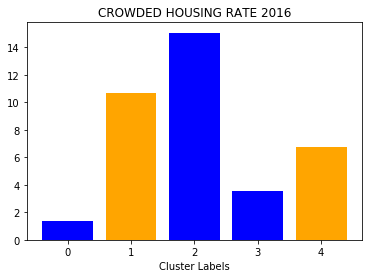

,Cluster Labels,PERCENT OF HOUSING CROWDED
0,0,1.344444
1,1,10.683333
2,2,15.050000
3,3,3.510714
4,4,6.755556


In [69]:
tp = Chicago_merged.groupby(['Cluster Labels']).mean().reset_index().drop(['Latitude', 'Longitude'], 1)

plt.bar(tp['Cluster Labels'], tp['PERCENT OF HOUSING CROWDED'], align='center', color = ['blue', 'orange', 'blue', 'blue', 'orange'])
plt.xlabel('Cluster Labels')
plt.title('CROWDED HOUSING RATE 2016')
 
plt.show()
tp

Clusters 2 and 1 that we have identified as best suited for families with children are obtained  have a higher percentof housing crowded than other neighborhoods .This verifies our results.

The recommendation for families with children who are looking for a neighborhood to move to in Chicago would be to look for places in clusters 2 and 1